### Simple Workflow Graph
#### State
1. Define the state
2. Use TypedDict

In [1]:
from typing import TypedDict

class State(TypedDict):
    graph_info: str

### Nodes
1. Nodes are just Python functions
2. The first positional argument is the state

In [2]:
def start_play(state: State):
    print("Start_Play Node has been called")
    return {"graph_info": state["graph_info"] + "I am planning to play..."}

def baseball(state: State):
    print("Baseball Node has been called")
    return {"graph_info": state["graph_info"] + "baseball!"}

def basketball(state: State):
    print("Basketball Node has been called")
    return {"graph_info": state["graph_info"] + "basketball!"}


In [3]:
import random
from typing import Literal

def random_choice(state: State) -> Literal["baseball", "basketball"]:
    graph_info = state["graph_info"]
    if random.random() < 0.5:
        return "baseball"
    else:
        return "basketball"

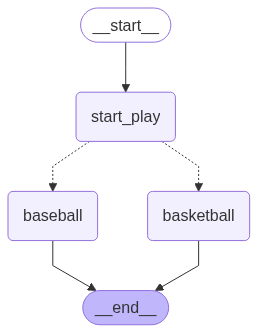

In [4]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build the graph
graph = StateGraph(State)

graph.add_node("start_play", start_play)
graph.add_node("baseball", baseball)
graph.add_node("basketball", basketball)


# Schedule the flow
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_choice)
graph.add_edge("baseball", END)
graph.add_edge("basketball", END)

# Compile the graph
app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
# Graph invokation
app.invoke({"graph_info": "My name is John. "})

Start_Play Node has been called
Basketball Node has been called


{'graph_info': 'My name is John. I am planning to play...basketball!'}